In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')
pd.set_option('max_columns',100)

In [50]:
df = pd.read_csv('listings_new.csv', )

In [51]:
df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,within an hour,95.0,False,47.0,47.0,5.0,True,True,True,Apartment,Entire home/apt,6.0,1.0,2.0,4.0,Real Bed,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,False,flexible,False,False,31.0,31.0,0.0,0.0,0.02
1,1,within an hour,95.0,False,47.0,47.0,5.0,True,True,True,Apartment,Entire home/apt,8.0,2.0,3.0,6.0,Real Bed,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,True,strict_14_with_grace_period,False,False,31.0,31.0,0.0,0.0,0.21
2,2,within a few hours,100.0,False,2.0,2.0,6.0,True,True,True,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,41.0,33.0,100.000000,55.906121,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,False,moderate,False,False,2.0,0.0,2.0,0.0,3.05
3,3,within an hour,100.0,True,5.0,5.0,8.0,True,True,False,Apartment,Entire home/apt,6.0,2.0,3.0,5.0,Real Bed,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,True,strict_14_with_grace_period,False,True,2.0,2.0,0.0,0.0,0.47
4,4,within an hour,100.0,True,1.0,1.0,8.0,True,True,True,Apartment,Private room,2.0,1.0,1.0,1.0,Real Bed,17.0,45.0,419.646678,27.746221,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,True,strict_14_with_grace_period,True,True,1.0,0.0,1.0,0.0,2.29


In [52]:
df.drop(['Unnamed: 0'],1,inplace = True)

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df.select_dtypes('object').columns:
    df[i] = le.fit_transform(df[i])

In [54]:
for i in df.select_dtypes('bool').columns:
    df[i] = df[i].astype(int)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20360 entries, 0 to 20359
Data columns (total 52 columns):
host_response_time                              20360 non-null int32
host_response_rate                              20360 non-null float64
host_is_superhost                               20360 non-null int32
host_listings_count                             20360 non-null float64
host_total_listings_count                       20360 non-null float64
host_verifications                              20360 non-null float64
host_has_profile_pic                            20360 non-null int32
host_identity_verified                          20360 non-null int32
is_location_exact                               20360 non-null int32
property_type                                   20360 non-null int32
room_type                                       20360 non-null int32
accommodates                                    20360 non-null float64
bathrooms                                       20360

In [56]:
import statsmodels.api as sm

def smodels(X,y):
    X_constant = sm.add_constant(np.array(X))
    model = sm.OLS(y,X_constant).fit()
    return model.summary()

In [57]:
df['log_price'] = np.log(df['price'])

In [58]:
print(df.price.describe(),df.log_price.describe())

count    20360.000000
mean       133.835609
std        472.310755
min          6.000000
25%         39.000000
50%         61.000000
75%        109.000000
max      10000.000000
Name: price, dtype: float64 count    20360.000000
mean         4.241536
std          0.858511
min          1.791759
25%          3.663562
50%          4.110874
75%          4.691348
max          9.210340
Name: log_price, dtype: float64


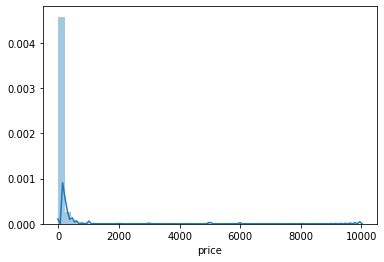

In [59]:
sns.distplot(df.price)

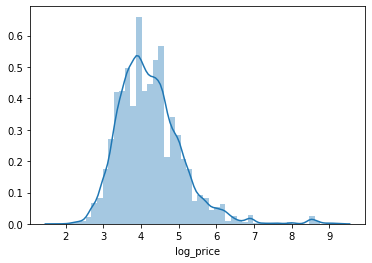

In [60]:
sns.distplot(df.log_price)

In [61]:
# plt.figure(figsize=(50,80))
# # fig.subplots_adjust(hspace=10, wspace=0.4)

# for i,j in enumerate(df.columns):
# #     plt.title(j)
#     plt.subplot(14,4, i+1)
#     sns.distplot(df[j])
    

In [62]:
y = df.log_price
X = df.drop(['price','log_price'],1)

In [63]:
smodels(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     339.4
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:49:37   Log-Likelihood:                -19600.
No. Observations:               20360   AIC:                         3.930e+04
Df Residuals:                   20309   BIC:                         3.971e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0351      0.196     15.504      0.000       2.651       3.419
x1             0.0001      0.006      0.022      0.982      -0.012       0.013
x2             0.0006      0.000      1.857      0.063   -3.35e-05       0.001
x3             0.0127      0.012      1.057      0.290      -0.011       0.036
x4            -0.0007   7.51e-05     -9.949      0.000      -0.001      -0.001
x5            -0.0007   7.51e-05     -9.949      0.000      -0.001      -0.001
x6            -0.0234      0.002    -10.836      0.000      -0.028      -0.019
x7            -0.0272      0.098     -0.277      0.782      -0.220       0.165
x8            -0.0003      0.010     -0.027      0.978      -0.020       0.019
x9             0.0074      0.010      0.770      0.442      -0.011       0.026
x10            0.0006      0.001      0.874      0.382      -0.001       0.002
x11           -0.0067      0.005     -1.403      0.160      -0.016       0.003
x12            0.2060      0.005     42.420      0.000       0.196       0.216
x13            0.0115      0.009      1.340      0.180      -0.005       0.028
x14            0.0181      0.008      2.145      0.032       0.002       0.035
x15           -0.0583      0.005    -11.229      0.000      -0.069      -0.048
x16           -0.0183      0.038     -0.481      0.631      -0.093       0.056
x17            0.0023      0.000      5.024      0.000       0.001       0.003
x18         5.047e-05   1.16e-05      4.334      0.000    2.76e-05    7.33e-05
x19            0.0012      0.000      8.062      0.000       0.001       0.001
x20            0.0398      0.004     10.061      0.000       0.032       0.048
x21            0.0019      0.000      5.841      0.000       0.001       0.003
x22            0.0004      0.001      0.318      0.751      -0.002       0.003
x23            0.0002   4.45e-05      5.014      0.000       0.000       0.000
x24           -0.0073      0.002     -4.809      0.000      -0.010      -0.004
x25            0.0007      0.001      0.719      0.472      -0.001       0.003
x26           -0.0004   4.56e-05     -8.422      0.000      -0.000      -0.000
x27            0.0006    7.9e-05      8.041      0.000       0.000       0.001
x28            0.0011      0.002      0.501      0.617      -0.003       0.006
x29           -0.0005   8.04e-05     -5.900      0.000      -0.001      -0.000
x30            0.0075      0.001      5.355      0.000       0.005       0.010
x31           -0.0040      0.001     -3.085      0.002      -0.007      -0.001
x32            0.0037      0.001      5.999      0.000       0.003       0.005
x33            0.0002   4.36e-05      4.199      0.000    9.77e-05       0.000
x34           -0.0002      0.000     -1.677      0.094      -0.000    3.65e-05
x35           -0.0009      0.001     -1.714      0.087      -0.002       0.000
x3

In [64]:
df.drop('price',1,inplace = True)

##### Scaling Data

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
sc = StandardScaler()

In [67]:
df.columns

Index(['host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bo

In [68]:
scale_columns = ['host_response_time','host_is_superhost','host_has_profile_pic', 'host_identity_verified',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type','guests_included','instant_bookable',
                 'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification','log_price']

In [69]:
num_scale = df.drop(scale_columns,1)

In [70]:
num_scaled = sc.fit_transform(num_scale)

In [71]:
scaled_df = pd.DataFrame(num_scaled, columns= num_scale.columns)

In [72]:
cat_df = df[scale_columns]

In [73]:
total_df = pd.concat([scaled_df,cat_df],1)

In [74]:
total_df.head()

,host_response_rate,host_listings_count,host_total_listings_count,host_verifications,amenities,security_deposit,cleaning_fee,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,log_price
0,0.112842,0.521091,0.521091,-0.151925,-0.259349,-0.170046,0.067992,1.124452,-0.291926,-0.009910,-0.280945,-0.320120,-0.009910,-0.009911,-0.303222,-0.009910,-0.871563,-1.158772,-1.332799,0.592071,-0.551484,-0.706764,-1.055545,0.678735,0.766418,-8.142132,0.544791,0.564131,-0.928288,0.578319,0.685315,-0.256798,-0.088769,-0.945133,3,0,1,1,1,1,0,6.0,1.0,2.0,4.0,4,2.0,0,0,0,0,4.867534
1,0.112842,0.521091,0.521091,-0.151925,0.099321,-0.170046,0.258129,1.467557,-0.397474,-0.009892,-0.387974,-0.218527,-0.009891,-0.009892,-0.361392,-0.009892,0.668166,0.501483,0.116526,-0.923912,-0.304351,-0.103300,-0.551513,-0.335577,-0.160970,-0.550206,0.544791,-0.753118,-0.928288,0.578319,0.685315,-0.256798,-0.088769,-0.831637,3,0,1,1,1,1,0,8.0,2.0,3.0,6.0,4,2.0,1,3,0,0,4.094345
2,0.454141,-0.317791,-0.317791,0.294746,1.803007,-0.288286,0.398501,0.095136,-0.344700,-0.009892,-0.334460,-0.269324,-0.009891,-0.009892,-0.350815,-0.009892,-0.516241,-0.998102,-1.231683,-1.297194,1.491481,0.993908,-0.047481,0.678735,-0.160970,0.534355,0.544791,-0.753118,0.030992,-0.420966,-0.408159,-0.013146,-0.088769,0.864829,2,0,1,1,1,1,2,2.0,1.0,1.0,1.0,4,1.0,0,1,0,0,3.496508
3,0.454141,-0.261865,-0.261865,1.188087,2.251345,0.184675,0.971143,0.095136,-0.291926,-0.009892,-0.280945,-0.218527,-0.009891,-0.009892,-0.297934,-0.009892,0.312844,0.608596,0.554695,1.163421,0.239341,0.225863,0.355745,0.678735,0.766418,0.534355,0.544791,-0.753118,0.030992,-0.420966,-0.337613,-0.256798,-0.088769,-0.676326,3,1,1,1,0,1,0,6.0,2.0,3.0,5.0,4,3.0,1,3,0,1,5.347108
4,0.454141,-0.336432,-0.336432,1.188087,-0.349017,0.467615,-0.270780,1.124452,-0.397474,-0.009910,-0.387974,-0.421713,-0.009910,-0.009911,-0.408985,-0.009910,0.312844,0.501483,0.049116,-0.733462,3.616825,1.926534,0.456552,0.678735,0.766418,0.534355,0.544791,0.564131,0.990272,-0.455424,-0.408159,-0.134972,-0.088769,0.410846,3,1,1,1,1,1,2,2.0,1.0,1.0,1.0,4,1.0,1,3,1,1,3.806662


In [76]:
# plt.figure(figsize=(50,80))
# # fig.subplots_adjust(hspace=10, wspace=0.4)

# for i,j in enumerate(total_df.columns):
# #     plt.title(j)
#     plt.subplot(14,4, i+1)
#     sns.distplot(df[j])
    

In [77]:
X,y = total_df.drop(['log_price'],1), total_df.log_price
smodels(X,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     339.4
Date:                Fri, 15 Nov 2019   Prob (F-statistic):               0.00
Time:                        20:49:41   Log-Likelihood:                -19600.
No. Observations:               20360   AIC:                         3.930e+04
Df Residuals:                   20309   BIC:                         3.971e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6901      0.183     20.167      0.000       3.331       4.049
x1             0.0088      0.005      1.857      0.063      -0.000       0.018
x2            -0.0401      0.004     -9.949      0.000      -0.048      -0.032
x3            -0.0401      0.004     -9.949      0.000      -0.048      -0.032
x4            -0.0524      0.005    -10.836      0.000      -0.062      -0.043
x5             0.0257      0.005      5.024      0.000       0.016       0.036
x6             0.0213      0.005      4.334      0.000       0.012       0.031
x7             0.0493      0.006      8.062      0.000       0.037       0.061
x8             0.0274      0.005      5.841      0.000       0.018       0.037
x9             0.0080      0.025      0.318      0.751      -0.042       0.058
x10         4749.1323    947.243      5.014      0.000    2892.460    6605.805
x11           -0.1370      0.028     -4.809      0.000      -0.193      -0.081
x12            0.0133      0.018      0.719      0.472      -0.023       0.049
x13        -8177.0690    970.952     -8.422      0.000   -1.01e+04   -6273.925
x14         1.352e+04   1681.343      8.041      0.000    1.02e+04    1.68e+04
x15            0.0212      0.042      0.501      0.617      -0.062       0.104
x16        -1.009e+04   1710.452     -5.900      0.000   -1.34e+04   -6738.689
x17            0.0633      0.012      5.355      0.000       0.040       0.086
x18           -0.0748      0.024     -3.085      0.002      -0.122      -0.027
x19            0.1106      0.018      5.999      0.000       0.074       0.147
x20            0.0241      0.006      4.199      0.000       0.013       0.035
x21           -0.0131      0.008     -1.677      0.094      -0.028       0.002
x22           -0.0163      0.009     -1.714      0.087      -0.035       0.002
x23            0.0569      0.010      5.921      0.000       0.038       0.076
x24            0.0061      0.008      0.796      0.426      -0.009       0.021
x25            0.0326      0.007      4.982      0.000       0.020       0.045
x26           -0.0508      0.007     -7.380      0.000      -0.064      -0.037
x27            0.0193      0.007      2.699      0.007       0.005       0.033
x28            0.0275      0.005      5.084      0.000       0.017       0.038
x29           -0.0462      0.008     -5.896      0.000      -0.062      -0.031
x30            1.4113      0.046     30.645      0.000       1.321       1.502
x31           -1.2361      0.045    -27.682      0.000      -1.324      -1.149
x32           -0.4371      0.014    -31.181      0.000      -0.465      -0.410
x33           -0.0611      0.005    -13.316      0.000      -0.070      -0.052
x34           -0.0154      0.007     -2.211      0.027      -0.029      -0.002
x35            0.0001      0.006      0.022      0.982      -0.012       0.013
x3

###### Vif

In [30]:
# # using the vif method we can remove multicollinearity
# # X = df.drop(['log_price'],1)


# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif = [variance_inflation_factor(X.values, i) for i in range(0, X.shape[1])]

In [ ]:
# vif

In [31]:
# # removing collinear variables
# # function definition

# def calculate_vif(x):
#     thresh = 2.0
#     output = pd.DataFrame()
#     k = x.shape[1]
#     vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
#     for i in range(1,k):
#         a = np.argmax(vif)
#         print("REMOVED MAX VIF AND INDEX.:")
#         print(a,'-', np.max(vif))
#         if vif[a] <= thresh :
#             break
#         if i == 1 :          
#             output = x.drop(x.columns[a], axis = 1)
#             vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
#         elif i > 1 :
#             output = output.drop(output.columns[a],axis = 1)
#             vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
#     return(output)

In [32]:
train_out = calculate_vif(X)

REMOVED MAX VIF AND INDEX.:
1 - inf
REMOVED MAX VIF AND INDEX.:
14 - 147991378255.1138
REMOVED MAX VIF AND INDEX.:
8 - 29872048363.12952
REMOVED MAX VIF AND INDEX.:
10 - 6210418168.150569
REMOVED MAX VIF AND INDEX.:
41 - 356.9011890079679
REMOVED MAX VIF AND INDEX.:
25 - 101.1666335926487
REMOVED MAX VIF AND INDEX.:
11 - 90.36349411371602
REMOVED MAX VIF AND INDEX.:
12 - 29.74205928443305
REMOVED MAX VIF AND INDEX.:
7 - 25.221338128474287
REMOVED MAX VIF AND INDEX.:
28 - 25.09587940840758
REMOVED MAX VIF AND INDEX.:
32 - 18.220846106588915
REMOVED MAX VIF AND INDEX.:
33 - 10.506501214782967
REMOVED MAX VIF AND INDEX.:
26 - 9.512252188641304
REMOVED MAX VIF AND INDEX.:
7 - 8.821662606326898
REMOVED MAX VIF AND INDEX.:
30 - 6.14188107620466
REMOVED MAX VIF AND INDEX.:
14 - 4.645055290527723
REMOVED MAX VIF AND INDEX.:
13 - 4.525296492057382
REMOVED MAX VIF AND INDEX.:
28 - 4.14515719362958
REMOVED MAX VIF AND INDEX.:
19 - 3.5191455037355444
REMOVED MAX VIF AND INDEX.:
10 - 3.415945727551

In [33]:
train_out.head()

,host_response_rate,host_total_listings_count,host_verifications,amenities,security_deposit,cleaning_fee,extra_people,maximum_minimum_nights,maximum_maximum_nights,availability_30,availability_365,number_of_reviews,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0.112842,0.521091,-0.151925,-0.259349,-0.170046,0.067992,1.124452,-0.320120,-0.009911,-0.871563,0.592071,-0.551484,0.766418,-8.142132,0.564131,-0.256798,-0.088769,-0.945133,0,1,1,0,0,0,0
1,0.112842,0.521091,-0.151925,0.099321,-0.170046,0.258129,1.467557,-0.218527,-0.009892,0.668166,-0.923912,-0.304351,-0.160970,-0.550206,-0.753118,-0.256798,-0.088769,-0.831637,0,1,1,0,1,0,0
2,0.454141,-0.317791,0.294746,1.803007,-0.288286,0.398501,0.095136,-0.269324,-0.009892,-0.516241,-1.297194,1.491481,-0.160970,0.534355,-0.753118,-0.013146,-0.088769,0.864829,0,1,1,2,0,0,0
3,0.454141,-0.261865,1.188087,2.251345,0.184675,0.971143,0.095136,-0.218527,-0.009892,0.312844,1.163421,0.239341,0.766418,0.534355,-0.753118,-0.256798,-0.088769,-0.676326,1,1,1,0,1,0,1
4,0.454141,-0.336432,1.188087,-0.349017,0.467615,-0.270780,1.124452,-0.421713,-0.009911,0.312844,-0.733462,3.616825,0.766418,0.534355,0.564131,-0.134972,-0.088769,0.410846,1,1,1,2,1,1,1


In [34]:
smodels(train_out,y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     22.80
Date:                Fri, 15 Nov 2019   Prob (F-statistic):          8.51e-103
Time:                        13:51:30   Log-Likelihood:                -28608.
No. Observations:               20360   AIC:                         5.727e+04
Df Residuals:                   20334   BIC:                         5.747e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0071      0.016     -0.450      0.653      -0.038       0.024
x1             0.0228      0.007      3.110      0.002       0.008       0.037
x2             0.0202      0.008      2.678      0.007       0.005       0.035
x3            -0.0692      0.007     -9.397      0.000      -0.084      -0.055
x4            -0.0058      0.008     -0.740      0.459      -0.021       0.009
x5             0.0137      0.008      1.811      0.070      -0.001       0.029
x6             0.0463      0.008      5.551      0.000       0.030       0.063
x7             0.0316      0.007      4.428      0.000       0.018       0.046
x8            -0.0540      0.008     -7.052      0.000      -0.069      -0.039
x9            -0.0010      0.007     -0.149      0.882      -0.015       0.013
x10            0.0366      0.008      4.818      0.000       0.022       0.051
x11            0.0587      0.008      7.589      0.000       0.044       0.074
x12           -0.0106      0.009     -1.175      0.240      -0.028       0.007
x13            0.0389      0.008      4.759      0.000       0.023       0.055
x14           -0.0569      0.009     -6.621      0.000      -0.074      -0.040
x15            0.0207      0.008      2.598      0.009       0.005       0.036
x16           -0.0499      0.008     -6.524      0.000      -0.065      -0.035
x17           -0.0187      0.007     -2.682      0.007      -0.032      -0.005
x18           -0.0594      0.009     -6.744      0.000      -0.077      -0.042
x19            0.0256      0.019      1.381      0.167      -0.011       0.062
x20            0.0026      0.015      0.167      0.867      -0.028       0.033
x21            0.0018      0.001      1.634      0.102      -0.000       0.004
x22           -0.0042      0.007     -0.589      0.556      -0.018       0.010
x23           -0.0044      0.014     -0.306      0.760      -0.032       0.024
x24           -0.2712      0.073     -3.691      0.000      -0.415      -0.127
x25            0.1837      0.046      3.963      0.000       0.093       0.275
==============================================================================
Omnibus:                    34949.734   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25631363.454
Skew:                          12.204   Prob(JB):                         0.00
Kurtosis:                     175.099   Cond. No.                         81.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3,95.0,0,47.0,47.0,5.0,1,1,1,1,0,6.0,1.0,2.0,4.0,4,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,0,0,0,0,31.0,31.0,0.0,0.0,0.02
1,3,95.0,0,47.0,47.0,5.0,1,1,1,1,0,8.0,2.0,3.0,6.0,4,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1,3,0,0,31.0,31.0,0.0,0.0,0.21
2,2,100.0,0,2.0,2.0,6.0,1,1,1,1,2,2.0,1.0,1.0,1.0,4,41.0,33.0,100.000000,55.906121,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,0,1,0,0,2.0,0.0,2.0,0.0,3.05
3,3,100.0,1,5.0,5.0,8.0,1,1,0,1,0,6.0,2.0,3.0,5.0,4,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1,3,0,1,2.0,2.0,0.0,0.0,0.47
4,3,100.0,1,1.0,1.0,8.0,1,1,1,1,2,2.0,1.0,1.0,1.0,4,17.0,45.0,419.646678,27.746221,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1,3,1,1,1.0,0.0,1.0,0.0,2.29


In [36]:
df.log_price = np.log(df.price)

In [37]:
daf = df.drop('price',1)

In [38]:
X, y = daf.drop('log_price',1), daf.log_price

KeyError: "['log_price'] not found in axis"